<a href="https://colab.research.google.com/github/msaipraveenkumar/LR_Delivery_Time_Prediction_mulumudisaipraveenkumar.zip/blob/main/LR_Delivery_Time_Estimation_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [266]:
from logging import warning
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings('ignore')

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [267]:
# Importing the file porter_data_1.csv
porter = pd.read_csv('/content/sample_data/porter_data_1.csv')

In [268]:
porter.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [269]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [270]:
categorical_columns = porter.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['created_at', 'actual_delivery_time'], dtype='object')


In [271]:
porter.isnull().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
dtype: int64

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [272]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
portar = porter.copy()
portar['created_at'] = pd.to_datetime(portar['created_at'])
portar['actual_delivery_time'] = pd.to_datetime(portar['actual_delivery_time'])


In [273]:
portar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [274]:
# Convert categorical features to category type
categorical_columns = portar.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)


Categorical columns: Index([], dtype='object')


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [275]:
from datetime import time
# Calculate time taken in minutes
time_taken = (portar['actual_delivery_time'] - portar['created_at']).dt.total_seconds() / 60
portar['time_taken'] = time_taken

In [276]:
portar.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  
0                      21.0     34.44        47.0  
1                       2.0     27.60        44.0  
2                      18.0     11.56        55.0  
3                       8.0     31.80        59.0  
4                       7.0      8.20        46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [277]:
# Extract the hour and day of week from the 'created_at' timestamp
hour_of_day = portar['created_at'].dt.hour
day_of_week = portar['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
is_weekend = portar['created_at'].dt.dayofweek >= 5

# Create a new DataFrame with the extracted features
df_features = pd.DataFrame({
    'hour_of_day': hour_of_day,
    'day_of_week': day_of_week,
    'is_weekend': is_weekend
})

portar = pd.concat([portar, df_features], axis=1)
portar.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  hour_of_day  day_of_week  \
0                      21.0     34.44        47.0           22            4   
1                       2.0     27.60        44.0           21            1   
2                      18.0     11.56        55.0            0            0   
3                       8.0     31.80        59.0            3            3   
4                       7.0      8.20        46.0            2            1   

   is_weekend  
0       False  
1       False  
2       False  
3       False  
4       False

In [278]:
# Drop unnecessary columns
portar = portar.drop(['created_at', 'actual_delivery_time'], axis=1)
portar.head()

market_id  store_primary_category  order_protocol  total_items  subtotal  \
0        1.0                       4             1.0            4      3441   
1        2.0                      46             2.0            1      1900   
2        2.0                      36             3.0            4      4771   
3        1.0                      38             1.0            1      1525   
4        1.0                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  time_taken  \
0                14.0                      21.0     34.44        47.0   
1                 2.0                       2.0     27.60        44.0   
2                 6.0                      18.0     11.56        55.0   
3                 6.0                       8.0     31.80        59.0   
4                 5.0                       7.0      8.20        46.0   

   hour_of_day  day_of_week  is_weekend  
0           22            4       False  
1           21            1       False  
2            0            0       False  
3            3            3       False  
4            2            1       False

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [279]:
# Define target variable (y) and features (X)
y_target = portar['time_taken']
X_features = portar.drop('time_taken', axis=1)

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [280]:
# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, train_size=0.7, random_state=100)
print(X_train.shape, X_test.shape)

(123043, 15) (52734, 15)


In [281]:
y_train.head()

94746     41.0
173338    41.0
37592     44.0
42763     40.0
27506     44.0
Name: time_taken, dtype: float64

In [282]:
X_train.head()

market_id  store_primary_category  order_protocol  total_items  \
94746         4.0                      24             5.0            2   
173338        4.0                      72             5.0            1   
37592         4.0                      55             5.0            1   
42763         2.0                      28             4.0            6   
27506         2.0                      72             1.0            3   

        subtotal  num_distinct_items  min_item_price  max_item_price  \
94746       1790                   2             795             995   
173338       845                   1             795             795   
37592       1900                   1            1200            1200   
42763        463                   3               0             299   
27506       3500                   3             600            1200   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
94746                    10.0                 9.0                      15.0   
173338                  134.0                76.0                     136.0   
37592                    21.0                21.0                      28.0   
42763                    98.0                87.0                     129.0   
27506                     7.0                13.0                      17.0   

        distance  hour_of_day  day_of_week  is_weekend  
94746      18.04           18            0       False  
173338     24.28            2            5        True  
37592      28.24           23            6        True  
42763      13.88            1            5        True  
27506       8.00            5            5        True

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [283]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)


Numerical columns: Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance'],
      dtype='object')
Categorical columns: Index([], dtype='object')


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

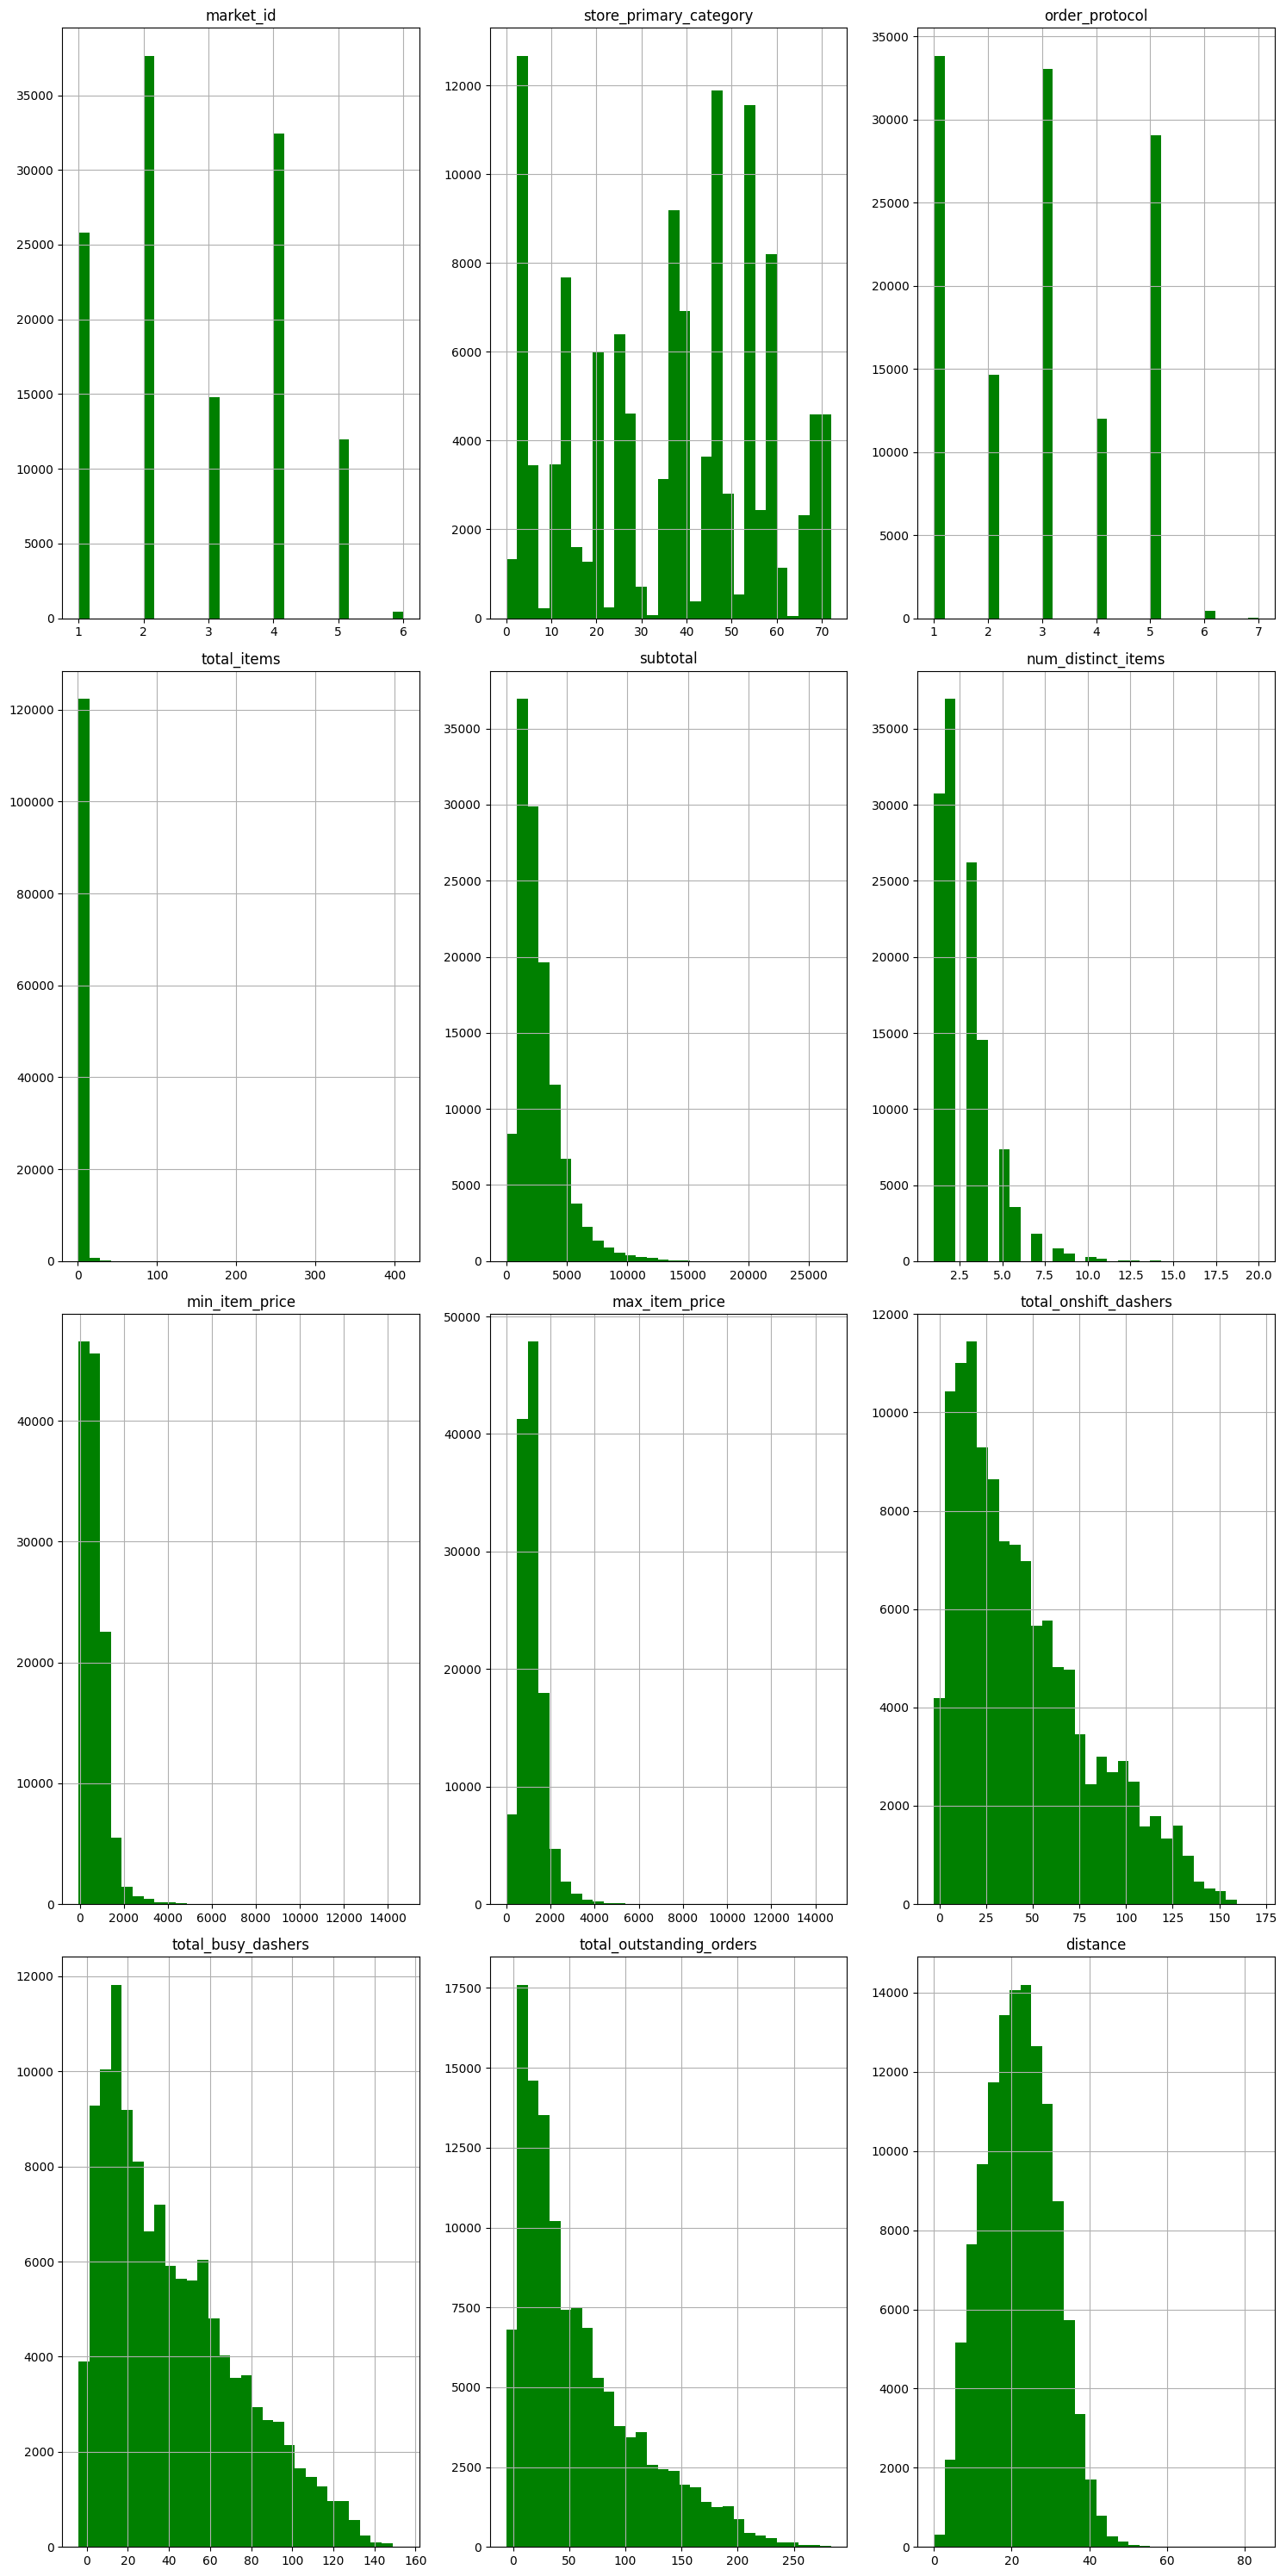

In [284]:
# Plot distributions for all numerical columns

X_train[numerical_columns].hist(bins=30, figsize=(15, 30),color='green')
plt.tight_layout()
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [285]:
# Distribution of categorical columns
X_train[categorical_columns].nunique()
x_train_cat = X_train[categorical_columns]
x_train_cat.head()

Empty DataFrame
Columns: []
Index: [94746, 173338, 37592, 42763, 27506]

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

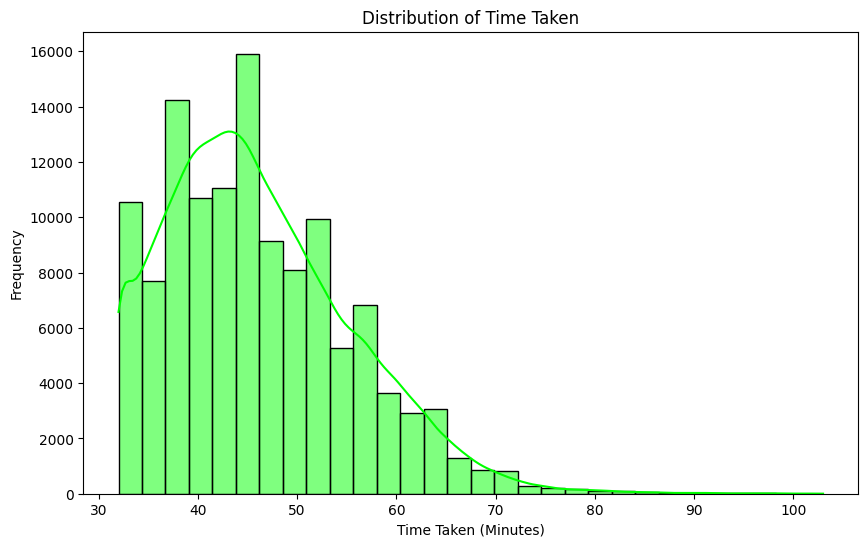

In [286]:
# Distribution of time_taken
plt.figure(figsize=(10, 6))
sns.histplot(y_train, bins=30, kde=True, color='lime')
plt.title('Distribution of Time Taken')
plt.xlabel('Time Taken (Minutes)')
plt.ylabel('Frequency')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

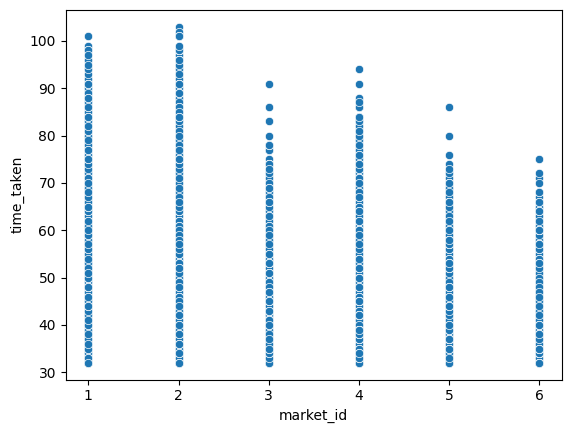

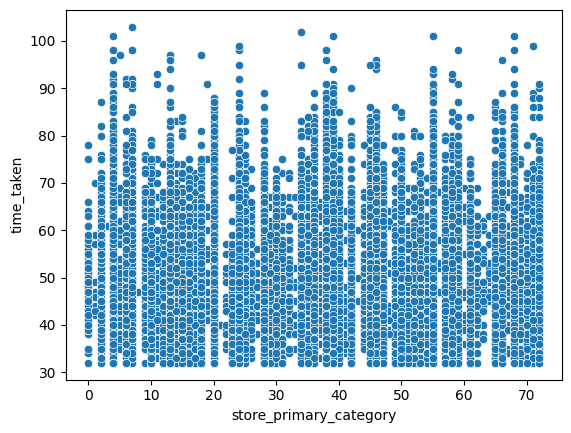

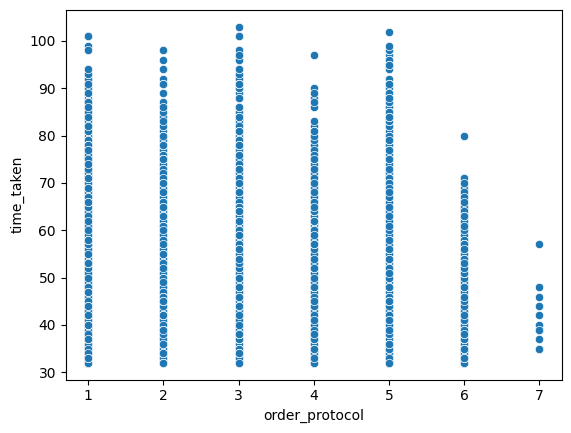

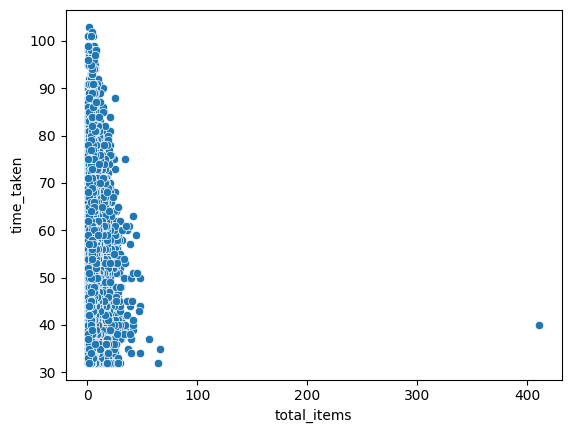

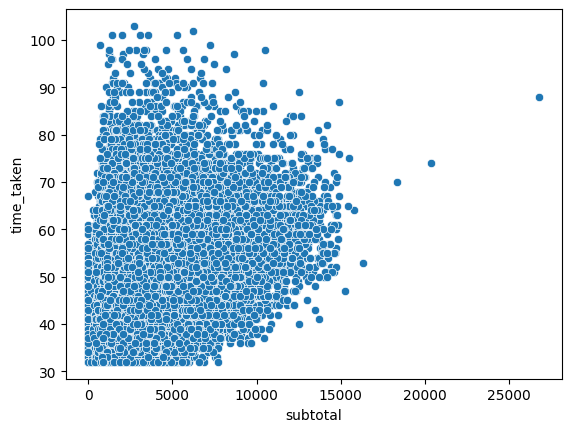

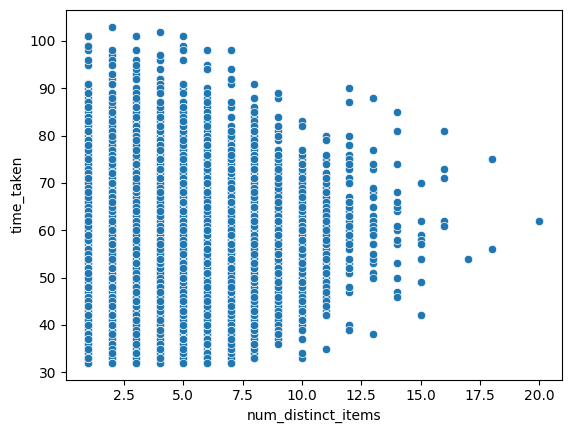

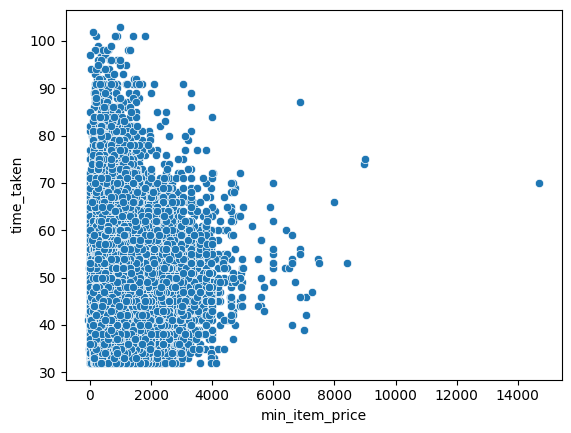

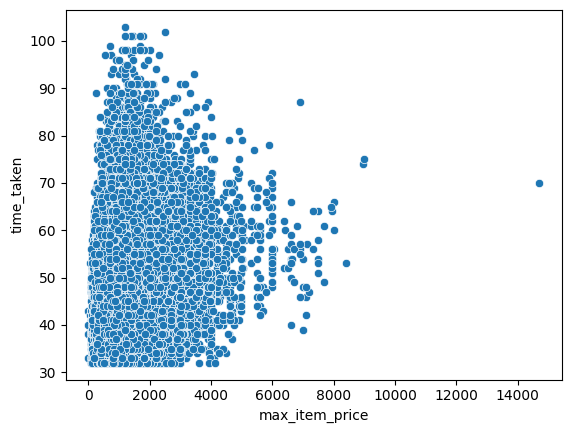

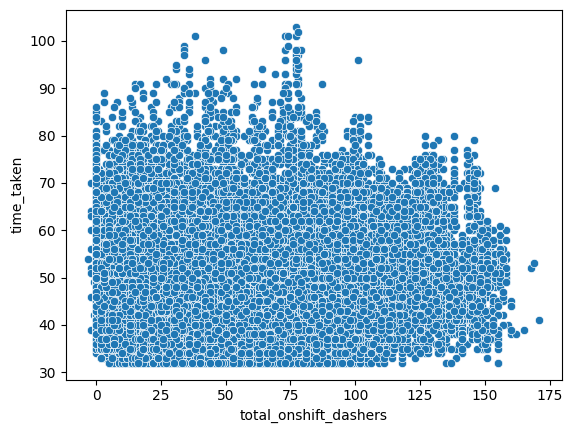

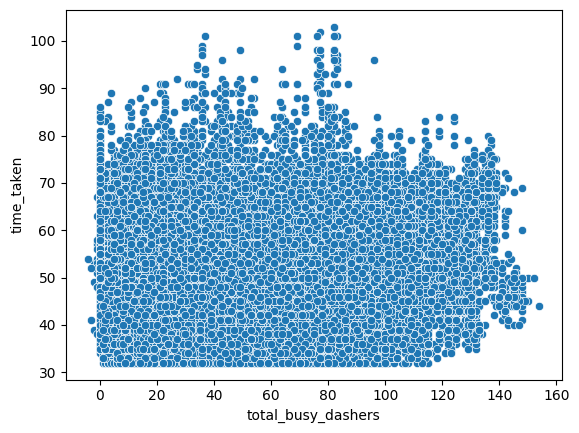

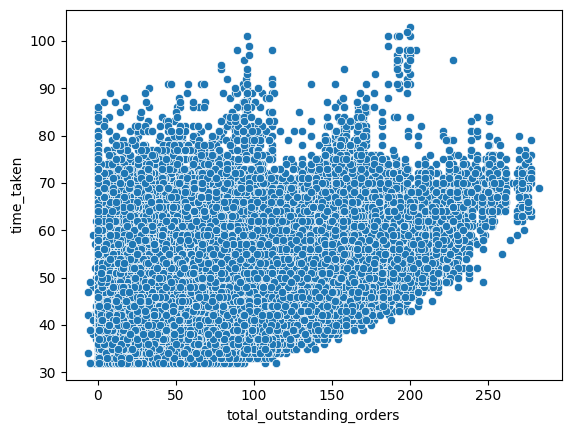

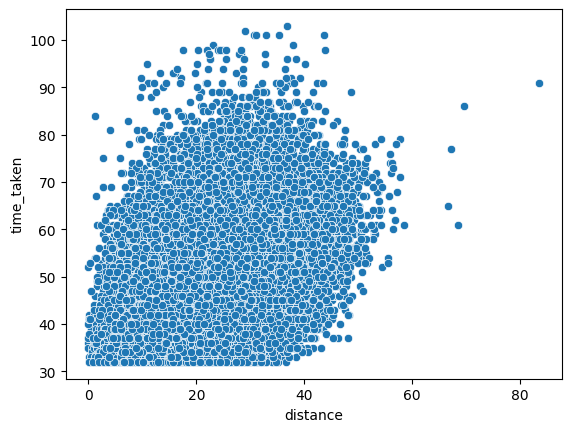

In [287]:
# Scatter plot to visualise the relationship between time_taken and other features
for i in X_train[numerical_columns]:
    sns.scatterplot(x=X_train[i], y=y_train)
    plt.show()


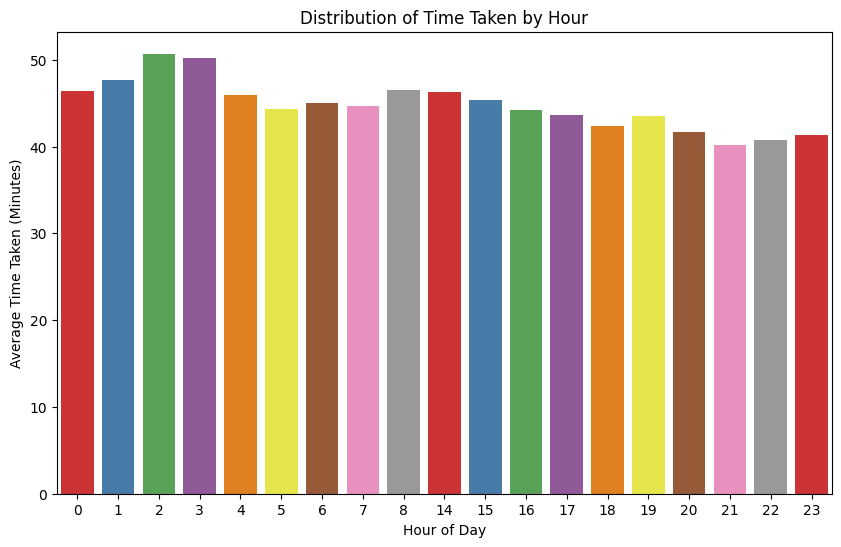

In [288]:
# Show the distribution of time_taken for different hours
time_taken_by_hour = portar.groupby('hour_of_day')['time_taken'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=time_taken_by_hour.index, y=time_taken_by_hour.values, palette='Set1', legend=False)
plt.title('Distribution of Time Taken by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Time Taken (Minutes)')
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

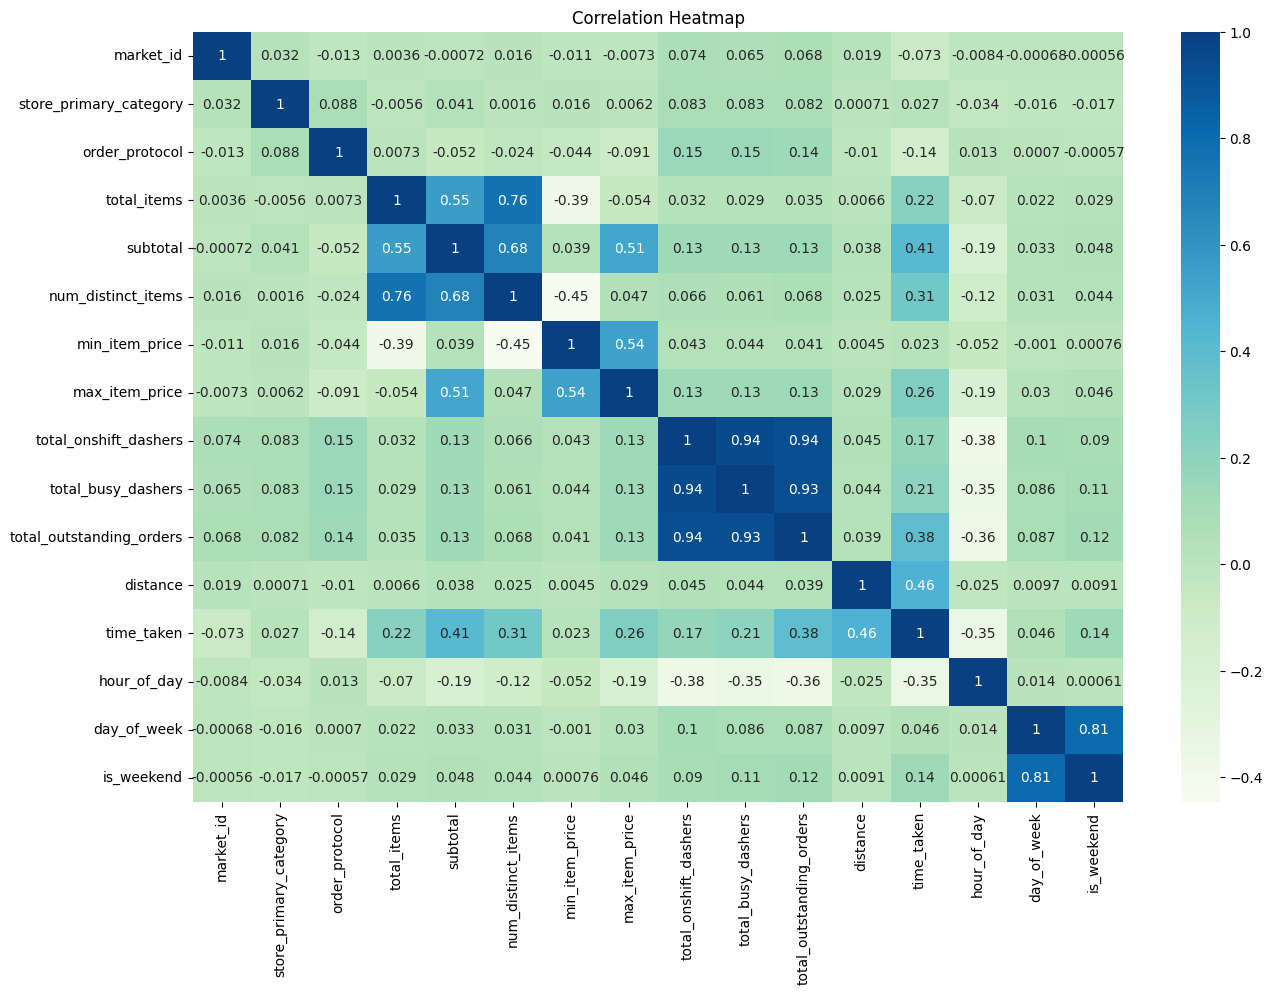

In [289]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(portar.corr(), annot=True, cmap="GnBu")
plt.title('Correlation Heatmap')
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [290]:
# Drop 3-5 weakly correlated columns from training dataset
X_train = X_train.drop(['market_id', 'order_protocol'], axis=1)
X_test = X_test.drop(['market_id', 'order_protocol'], axis=1)



In [291]:
X_train.head()

store_primary_category  total_items  subtotal  num_distinct_items  \
94746                       24            2      1790                   2   
173338                      72            1       845                   1   
37592                       55            1      1900                   1   
42763                       28            6       463                   3   
27506                       72            3      3500                   3   

        min_item_price  max_item_price  total_onshift_dashers  \
94746              795             995                   10.0   
173338             795             795                  134.0   
37592             1200            1200                   21.0   
42763                0             299                   98.0   
27506              600            1200                    7.0   

        total_busy_dashers  total_outstanding_orders  distance  hour_of_day  \
94746                  9.0                      15.0     18.04           18   
173338                76.0                     136.0     24.28            2   
37592                 21.0                      28.0     28.24           23   
42763                 87.0                     129.0     13.88            1   
27506                 13.0                      17.0      8.00            5   

        day_of_week  is_weekend  
94746             0       False  
173338            5        True  
37592             6        True  
42763             5        True  
27506             5        True

In [292]:
X_test.head()

store_primary_category  total_items  subtotal  num_distinct_items  \
139667                      45            3      1295                   2   
80077                        4            2      2950                   1   
41872                       46            1      1395                   1   
165269                      24            2      2967                   2   
151215                       6            3      1250                   2   

        min_item_price  max_item_price  total_onshift_dashers  \
139667             150             995                   59.0   
80077             1225            1225                   18.0   
41872             1395            1395                   28.0   
165269            1097            1249                  124.0   
151215             375             400                   39.0   

        total_busy_dashers  total_outstanding_orders  distance  hour_of_day  \
139667                59.0                      61.0     20.56            3   
80077                 17.0                      16.0     12.84            1   
41872                 27.0                      45.0     16.80            3   
165269               127.0                     200.0     19.00            3   
151215                30.0                      33.0     26.72           22   

        day_of_week  is_weekend  
139667            4       False  
80077             5        True  
41872             3       False  
165269            5        True  
151215            5        True

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

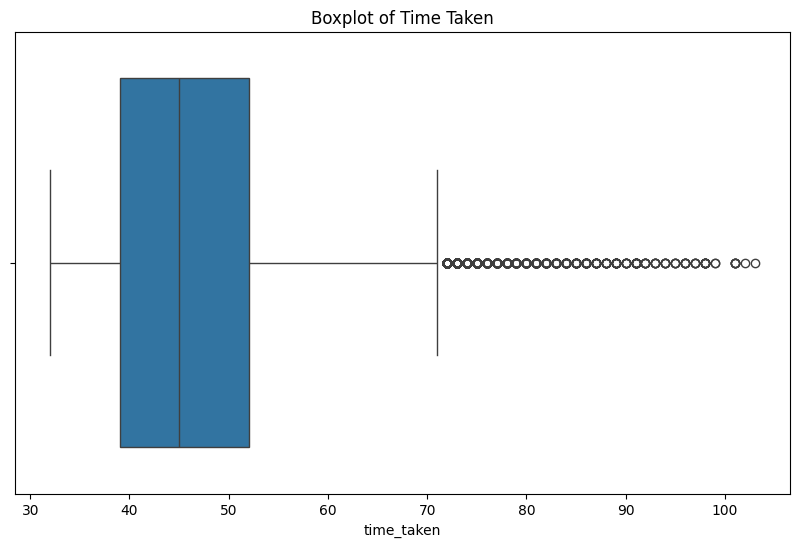

In [293]:
# Boxplot for time_taken
plt.figure(figsize=(10, 6))
sns.boxplot(x=y_train)
plt.title('Boxplot of Time Taken')
plt.show()

In [294]:
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

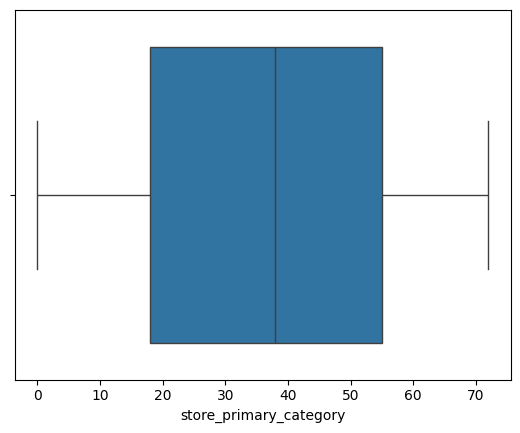

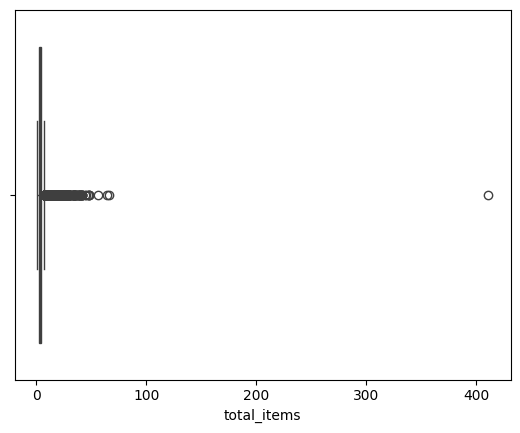

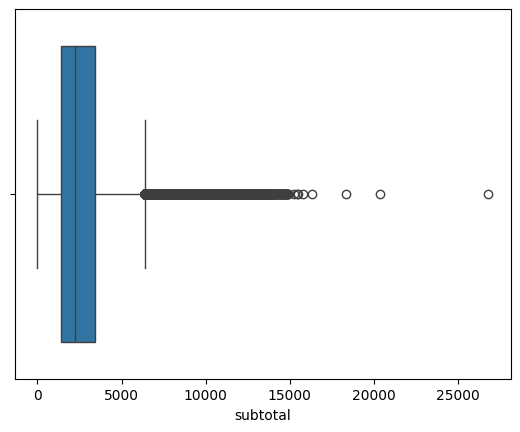

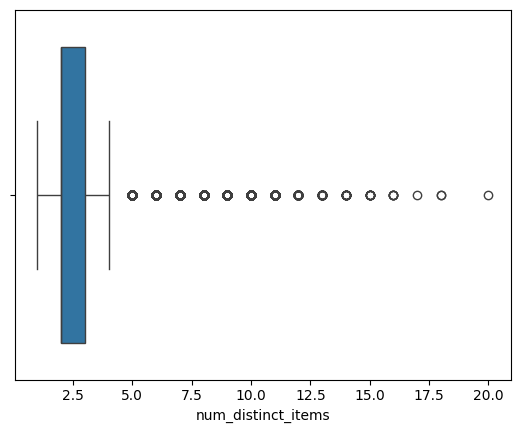

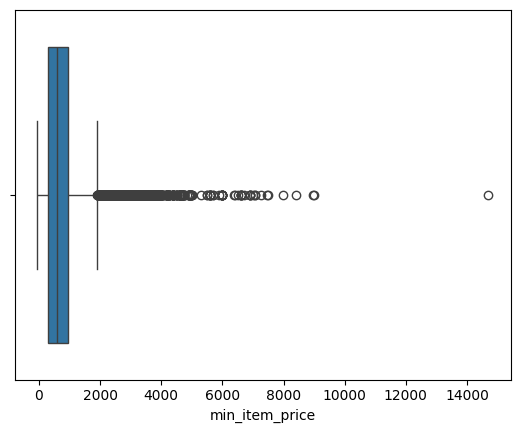

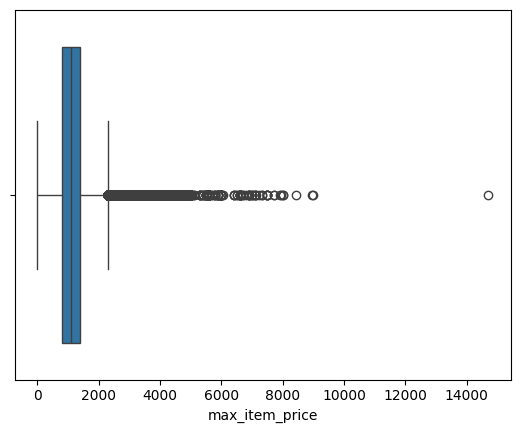

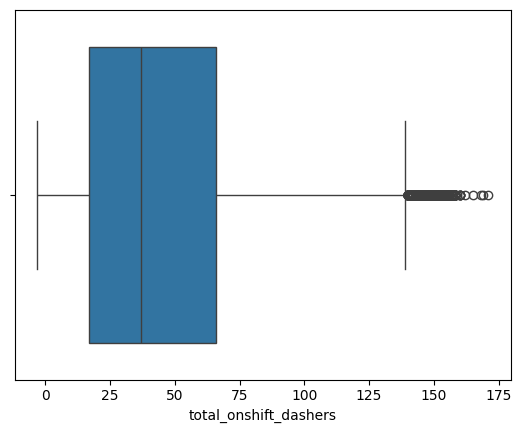

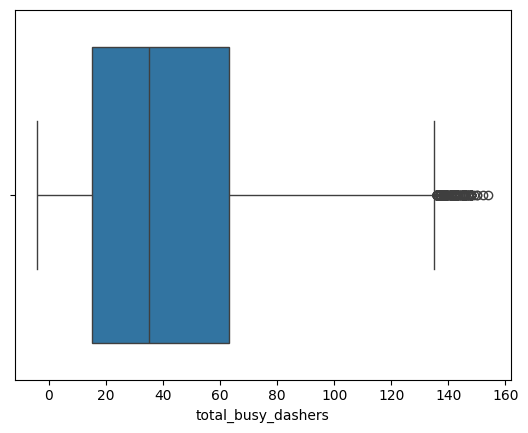

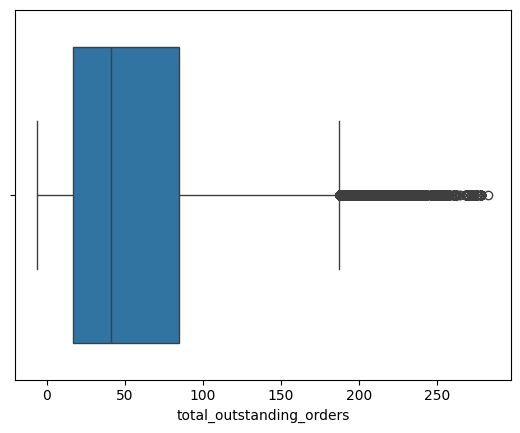

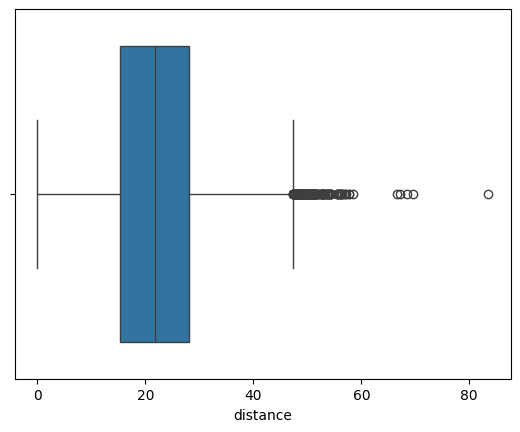

In [295]:
for i in X_train[numerical_columns]:
    sns.boxplot(x=X_train[i])
    plt.show()

In [296]:
X_train.describe()

store_primary_category    total_items       subtotal  \
count           123043.000000  123043.000000  123043.000000   
mean                35.940899       3.206082    2697.863625   
std                 20.738317       2.745043    1830.338637   
min                  0.000000       1.000000       0.000000   
25%                 18.000000       2.000000    1417.000000   
50%                 38.000000       3.000000    2220.000000   
75%                 55.000000       4.000000    3405.000000   
max                 72.000000     411.000000   26800.000000   

       num_distinct_items  min_item_price  max_item_price  \
count       123043.000000   123043.000000   123043.000000   
mean             2.674951      684.784506     1160.434645   
std              1.625552      520.731071      562.955073   
min              1.000000      -52.000000        0.000000   
25%              2.000000      299.000000      799.000000   
50%              2.000000      595.000000     1095.000000   
75%              3.000000      942.000000     1395.000000   
max             20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          123043.000000       123043.000000             123043.000000   
mean               44.981177           41.879180                 58.276651   
std                34.568806           32.149659                 52.689697   
min                -3.000000           -4.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                283.000000   

            distance    hour_of_day    day_of_week  
count  123043.000000  123043.000000  123043.000000  
mean       21.830150       8.467251       3.225799  
std         8.765038       8.678470       2.041310  
min         0.000000       0.000000       0.000000  
25%        15.320000       2.000000       1.000000  
50%        21.760000       3.000000       3.000000  
75%        28.120000      19.000000       5.000000  
max        83.520000      23.000000       6.000000

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [297]:
# Handle outliers
for i in X_train[numerical_columns]:
  Q1=X_train[i].quantile(0.25)
  Q3=X_train[i].quantile(0.75)
  IQR=Q3-Q1
  upper_limit=Q3+1.5*IQR
  lower_limit=Q1-1.5*IQR
  outlier_mask = (X_train[i] <= upper_limit) & (X_train[i] >= lower_limit)
  X_train = X_train[outlier_mask]
  y_train = y_train[outlier_mask]

In [298]:
X_train.shape, y_train.shape

((102483, 13), (102483,))

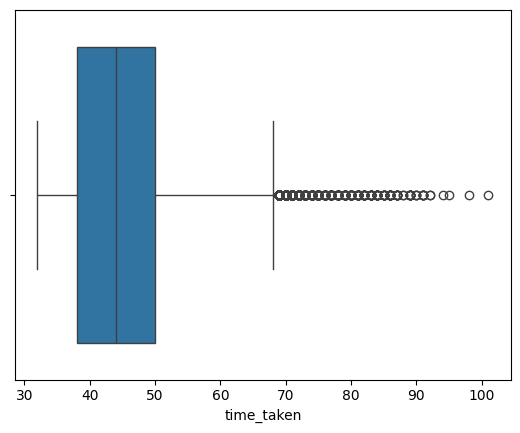

In [299]:
sns.boxplot(x=y_train)
plt.show()

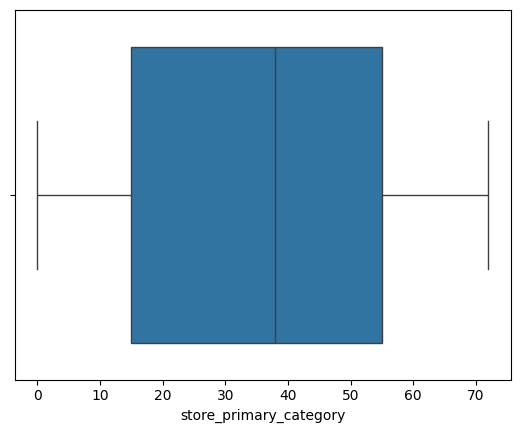

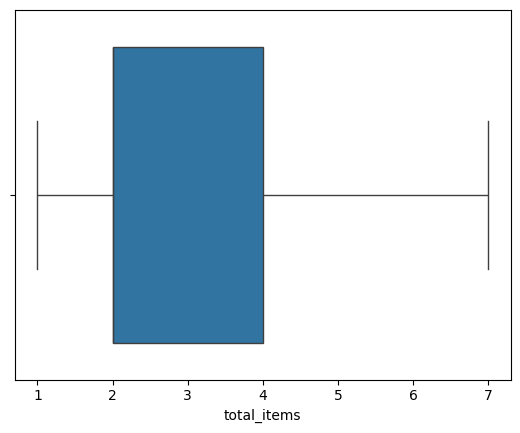

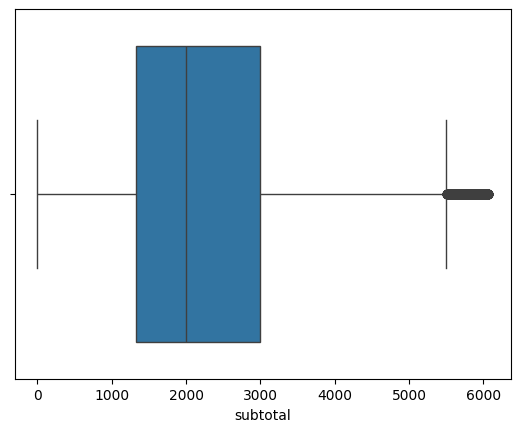

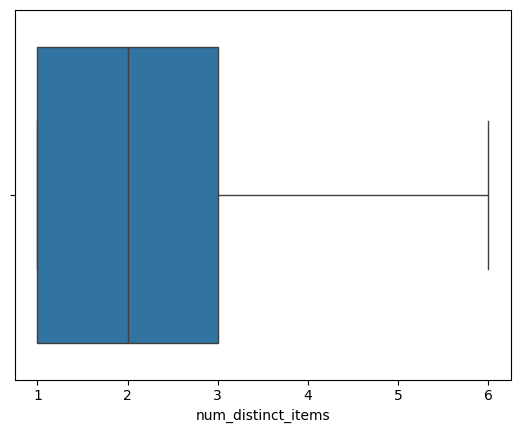

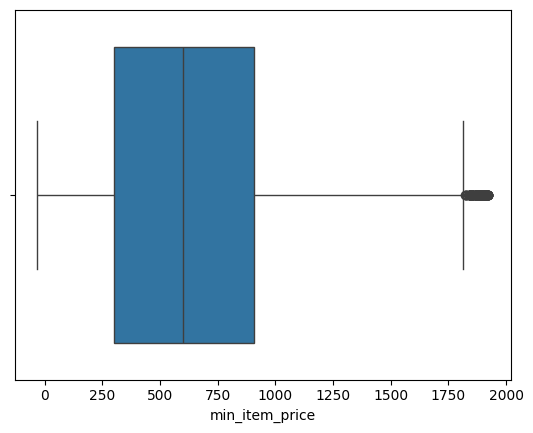

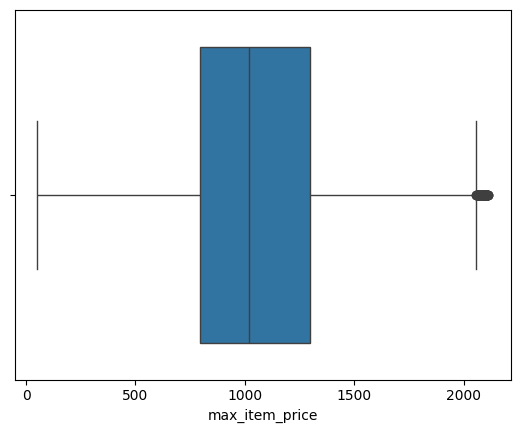

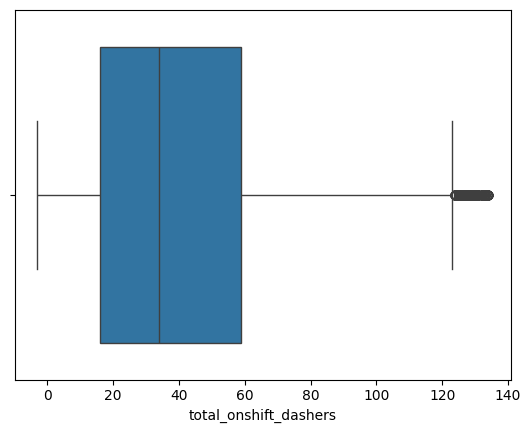

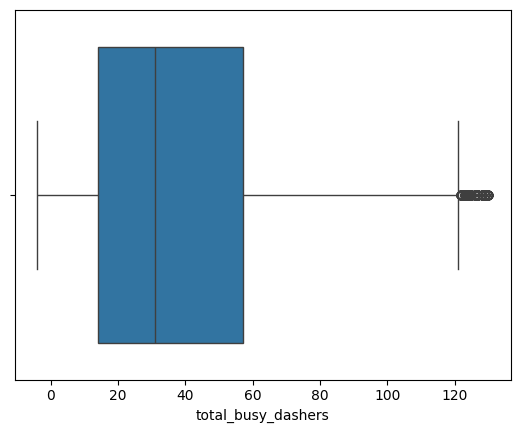

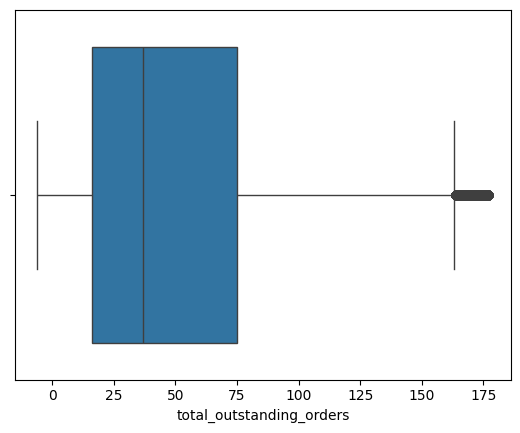

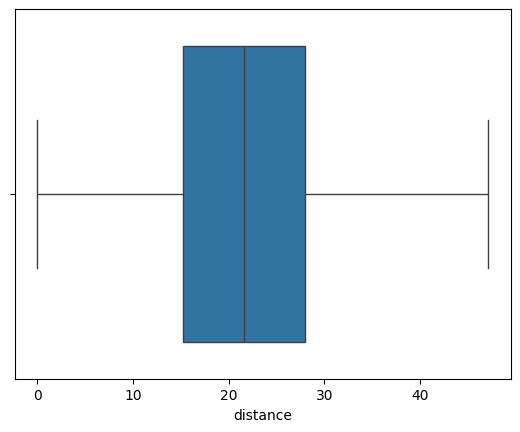

In [300]:
for i in X_train[numerical_columns]:
    sns.boxplot(x=X_train[i])
    plt.show()

In [301]:
X_train.store_primary_category.unique()

array([24, 72, 55, 28, 50, 38, 57, 39,  4, 25, 68, 58, 46, 47,  2, 18, 13,
       59, 20,  6, 15, 45, 34, 36, 12, 14, 66, 10, 61,  9, 65, 71, 42, 53,
       40, 52, 35,  7, 70, 54, 48, 37, 69, 29,  5, 49, 31, 26, 67, 23, 32,
       60, 16, 30, 44,  0, 27, 63, 17, 62, 51, 41, 33, 43, 11, 22, 56,  1,
        8, 19, 64,  3])

In [302]:
X_train.total_items.describe()

count    102483.000000
mean          2.735381
std           1.459452
min           1.000000
25%           2.000000
50%           2.000000
75%           4.000000
max           7.000000
Name: total_items, dtype: float64

In [303]:
X_train.subtotal.describe()

count    102483.000000
mean       2275.262063
std        1205.976699
min           0.000000
25%        1324.000000
50%        2000.000000
75%        2995.000000
max        6067.000000
Name: subtotal, dtype: float64

In [304]:
portar_list=X_train[X_train['subtotal']>4000].value_counts()
print (portar_list)

store_primary_category  total_items  subtotal  num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  total_busy_dashers  total_outstanding_orders  distance  hour_of_day  day_of_week  is_weekend
72                      7            6065      5                   185             995             63.0                   60.0                86.0                      18.44     19           4            False         1
0                       3            4197      3                   799             1599            27.0                   11.0                13.0                      33.16     2            3            False         1
                                     4870      3                   1390            1890            11.0                   12.0                13.0                      20.48     3            4            False         1
                        4            4415      4                   600             1895            78.0                   75.

In [305]:
X_train.num_distinct_items.value_counts()

num_distinct_items
2    33514
1    27107
3    23153
4    11977
5     5032
6     1700
Name: count, dtype: int64

In [306]:
X_train.min_item_price.value_counts()

min_item_price
795     2389
250     2014
150     1821
350     1757
500     1743
        ... 
1344       1
1446       1
1514       1
1520       1
1597       1
Name: count, Length: 1602, dtype: int64

In [307]:
portar_list=X_train[X_train['min_item_price']<0]
print (portar_list.value_counts())


store_primary_category  total_items  subtotal  num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  total_busy_dashers  total_outstanding_orders  distance  hour_of_day  day_of_week  is_weekend
38                      5            2585      3                   -7              1235            49.0                   47.0                59.0                      13.32     3            1            False         1
55                      1            3099      1                   -31             52              22.0                   26.0                34.0                      15.08     22           5            True          1
Name: count, dtype: int64


In [308]:
X_train['min_item_price']=X_train['min_item_price'].apply(lambda x: x if x >= 0 else (x*(-1)))

In [309]:
pd.DataFrame({
    'Column': X_train.columns.values,
    'Negative-Values': [X_train[col].min() if col in X_train.select_dtypes(include=[np.number]).columns else 0 for col in X_train.columns]
})

Column  Negative-Values
0     store_primary_category              0.0
1                total_items              1.0
2                   subtotal              0.0
3         num_distinct_items              1.0
4             min_item_price              0.0
5             max_item_price             52.0
6      total_onshift_dashers             -3.0
7         total_busy_dashers             -4.0
8   total_outstanding_orders             -6.0
9                   distance              0.0
10               hour_of_day              0.0
11               day_of_week              0.0
12                is_weekend              0.0

In [310]:
X_train['min_item_price']=X_train['min_item_price'].apply(lambda x: x if x > 0 else 1)

In [311]:
portar_list=X_train[X_train['min_item_price']<=0]
print (portar_list.value_counts())

Series([], Name: count, dtype: int64)


In [312]:
X_train.describe()

store_primary_category    total_items       subtotal  \
count           102483.000000  102483.000000  102483.000000   
mean                35.883981       2.735381    2275.262063   
std                 20.919836       1.459452    1205.976699   
min                  0.000000       1.000000       0.000000   
25%                 15.000000       2.000000    1324.000000   
50%                 38.000000       2.000000    2000.000000   
75%                 55.000000       4.000000    2995.000000   
max                 72.000000       7.000000    6067.000000   

       num_distinct_items  min_item_price  max_item_price  \
count       102483.000000   102483.000000   102483.000000   
mean             2.408809      653.365007     1058.596704   
std              1.223970      404.495281      378.192478   
min              1.000000        1.000000       52.000000   
25%              1.000000      300.000000      795.000000   
50%              2.000000      599.000000     1019.000000   
75%              3.000000      906.500000     1299.000000   
max              6.000000     1923.000000     2112.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          102483.000000       102483.000000             102483.000000   
mean               40.489115           37.887396                 50.660363   
std                30.200106           28.487560                 43.390997   
min                -3.000000           -4.000000                 -6.000000   
25%                16.000000           14.000000                 16.000000   
50%                34.000000           31.000000                 37.000000   
75%                59.000000           57.000000                 75.000000   
max               134.000000          130.000000                177.000000   

            distance    hour_of_day    day_of_week  
count  102483.000000  102483.000000  102483.000000  
mean       21.704004       9.068958       3.152689  
std         8.686531       8.834282       2.033527  
min         0.000000       0.000000       0.000000  
25%        15.200000       2.000000       1.000000  
50%        21.640000       4.000000       3.000000  
75%        28.000000      19.000000       5.000000  
max        47.160000      23.000000       6.000000

In [313]:
X_train[(X_train['min_item_price']==0) & (X_train['max_item_price']==0) & (X_train['total_items']!=0)].value_counts().sum()

np.int64(0)

In [314]:
X_train[(X_train['min_item_price']==0)].value_counts().sum()

np.int64(0)

In [315]:
X_train[(X_train['max_item_price']==0)].value_counts().sum()

np.int64(0)

In [316]:
X_train[(X_train['total_items']==0)].value_counts().sum()

np.int64(0)

In [317]:
X_train[(X_train['min_item_price']==0) & (X_train['max_item_price']==0)].value_counts().sum()

np.int64(0)

In [318]:
X_train[(X_train['min_item_price'] > X_train['max_item_price'])].value_counts()

store_primary_category  total_items  subtotal  num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  total_busy_dashers  total_outstanding_orders  distance  hour_of_day  day_of_week  is_weekend
72                      3            2738      2                   983             950             55.0                   48.0                69.0                      15.48     20           5            True          1
2                       1            872       1                   796             658             50.0                   50.0                66.0                      21.96     0            2            False         1
                                     1134      1                   805             710             33.0                   35.0                41.0                      10.32     1            1            False         1
68                      1            1197      1                   1194            1187            93.0                   90.0                154.0                     25.60     1            3            False         1
                                     1145      1                   971             832             51.0                   63.0                81.0                      25.48     2            4            False         1
                                                                                                                                                                                                                         ..
4                       1            1077      1                   1180            1080            34.0                   42.0                53.0                      15.84     21           5            True          1
                                     1020      1                   1285            1227            12.0                   12.0                29.0                      31.44     21           1            False         1
2                       1            2295      1                   1712            1707            39.0                   43.0                47.0                      26.44     5            5            True          1
                                     1560      1                   1577            1498            49.0                   50.0                71.0                      8.56      20           3            False         1
                                     1369      1                   672             671             68.0                   59.0                80.0                      18.88     20           3            False         1
Name: count, Length: 419, dtype: int64

In [319]:
X_train[(X_train['min_item_price'] > X_train['max_item_price'])].value_counts().sum()

np.int64(419)

In [320]:
condition = X_train['min_item_price'] > X_train['max_item_price']
X_train.loc[condition, ['min_item_price', 'max_item_price']] = X_train.loc[condition, ['max_item_price', 'min_item_price']].values


In [321]:
X_train[(X_train['min_item_price'] > X_train['max_item_price'])].value_counts().sum()

np.int64(0)

In [322]:
X_train[(X_train['min_item_price'] ==0) & (X_train['max_item_price']==0)].value_counts().sum()

np.int64(0)

In [323]:
pd.DataFrame({
    'Column': X_train.columns.values,
    'Negative-Values': [X_train[col].min() if col in X_train.select_dtypes(include=[np.number]).columns else 0 for col in X_train.columns]
})

Column  Negative-Values
0     store_primary_category              0.0
1                total_items              1.0
2                   subtotal              0.0
3         num_distinct_items              1.0
4             min_item_price              1.0
5             max_item_price             52.0
6      total_onshift_dashers             -3.0
7         total_busy_dashers             -4.0
8   total_outstanding_orders             -6.0
9                   distance              0.0
10               hour_of_day              0.0
11               day_of_week              0.0
12                is_weekend              0.0

In [324]:
#total_onshift_dashers, total_busy_dashers, total_outstanding_orders,
X_train[(X_train['total_onshift_dashers'] < 0) & (X_train['total_busy_dashers']<0) & (X_train['total_outstanding_orders']<0) ].value_counts().sum()

np.int64(0)

In [325]:
X_train[(X_train['total_onshift_dashers'] < 0)].value_counts().sum()

np.int64(12)

In [326]:
X_train[(X_train['total_onshift_dashers'] < 0)].value_counts()

store_primary_category  total_items  subtotal  num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  total_busy_dashers  total_outstanding_orders  distance  hour_of_day  day_of_week  is_weekend
4                       2            2831      2                   635             681             -1.0                    13.0                16.0                     15.76     22           0            False         1
                                     3538      2                   1238            1606            -2.0                    2.0                 10.0                     10.64     1            5            True          1
18                      1            986       1                   827             892             -2.0                    5.0                 1.0                      31.48     21           2            False         1
20                      3            2776      3                   358             1227            -2.0                    6.0                 6.0                      33.48     1            1            False         1
28                      2            1327      1                   615             680             -1.0                    6.0                 6.0                      14.72     18           6            True          1
35                      1            1202      1                   987             1092            -1.0                    9.0                 5.0                      30.92     19           5            True          1
39                      2            720       1                   495             515             -2.0                    1.0                 10.0                     18.64     4            1            False         1
                                     1862      2                   488             1162            -2.0                    3.0                 3.0                      24.12     3            0            False         1
50                      1            1524      1                   897             920             -2.0                    3.0                -3.0                      13.00     20           5            True          1
57                      2            1117      2                   339             956             -3.0                    0.0                 16.0                     7.48      2            3            False         1
59                      3            2238      3                   740             768             -1.0                    5.0                 10.0                     29.52     20           3            False         1
                        4            1874      3                   110             1378            -2.0                   -1.0                 11.0                     38.84     4            5            True          1
Name: count, dtype: int64

In [327]:
X_train['total_onshift_dashers']=X_train['total_onshift_dashers'].apply(lambda x: x if x >= 0 else (x*(-1)))
X_train[(X_train['total_onshift_dashers'] < 0)].value_counts().sum()


np.int64(0)

In [328]:
X_train[(X_train['total_busy_dashers']<0)].value_counts().sum()

np.int64(15)

In [329]:
X_train['total_busy_dashers']=X_train['total_busy_dashers'].apply(lambda x: x if x >= 0 else (x*(-1)))
X_train[(X_train['total_busy_dashers']<0)].value_counts().sum()

np.int64(0)

In [330]:
X_train[(X_train['total_outstanding_orders']<0) ].value_counts().sum()

np.int64(28)

In [331]:
X_train['total_outstanding_orders']=X_train['total_outstanding_orders'].apply(lambda x: x if x >= 0 else (x*(-1)))
X_train[(X_train['total_outstanding_orders']<0) ].value_counts().sum()

np.int64(0)

In [332]:
X_train[(X_train['total_onshift_dashers'] < 0) & (X_train['total_busy_dashers']<0)].value_counts().sum()

np.int64(0)

In [333]:
pd.DataFrame({
    'Column': X_train.columns.values,
    'Negative-Values': [X_train[col].min() if col in X_train.select_dtypes(include=[np.number]).columns else 0 for col in X_train.columns]
})

Column  Negative-Values
0     store_primary_category              0.0
1                total_items              1.0
2                   subtotal              0.0
3         num_distinct_items              1.0
4             min_item_price              1.0
5             max_item_price             52.0
6      total_onshift_dashers              0.0
7         total_busy_dashers              0.0
8   total_outstanding_orders              0.0
9                   distance              0.0
10               hour_of_day              0.0
11               day_of_week              0.0
12                is_weekend              0.0

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [334]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_columns = X_test.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_test.select_dtypes(include=['object']).columns
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['store_primary_category', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance'],
      dtype='object')
Categorical columns: Index([], dtype='object')


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

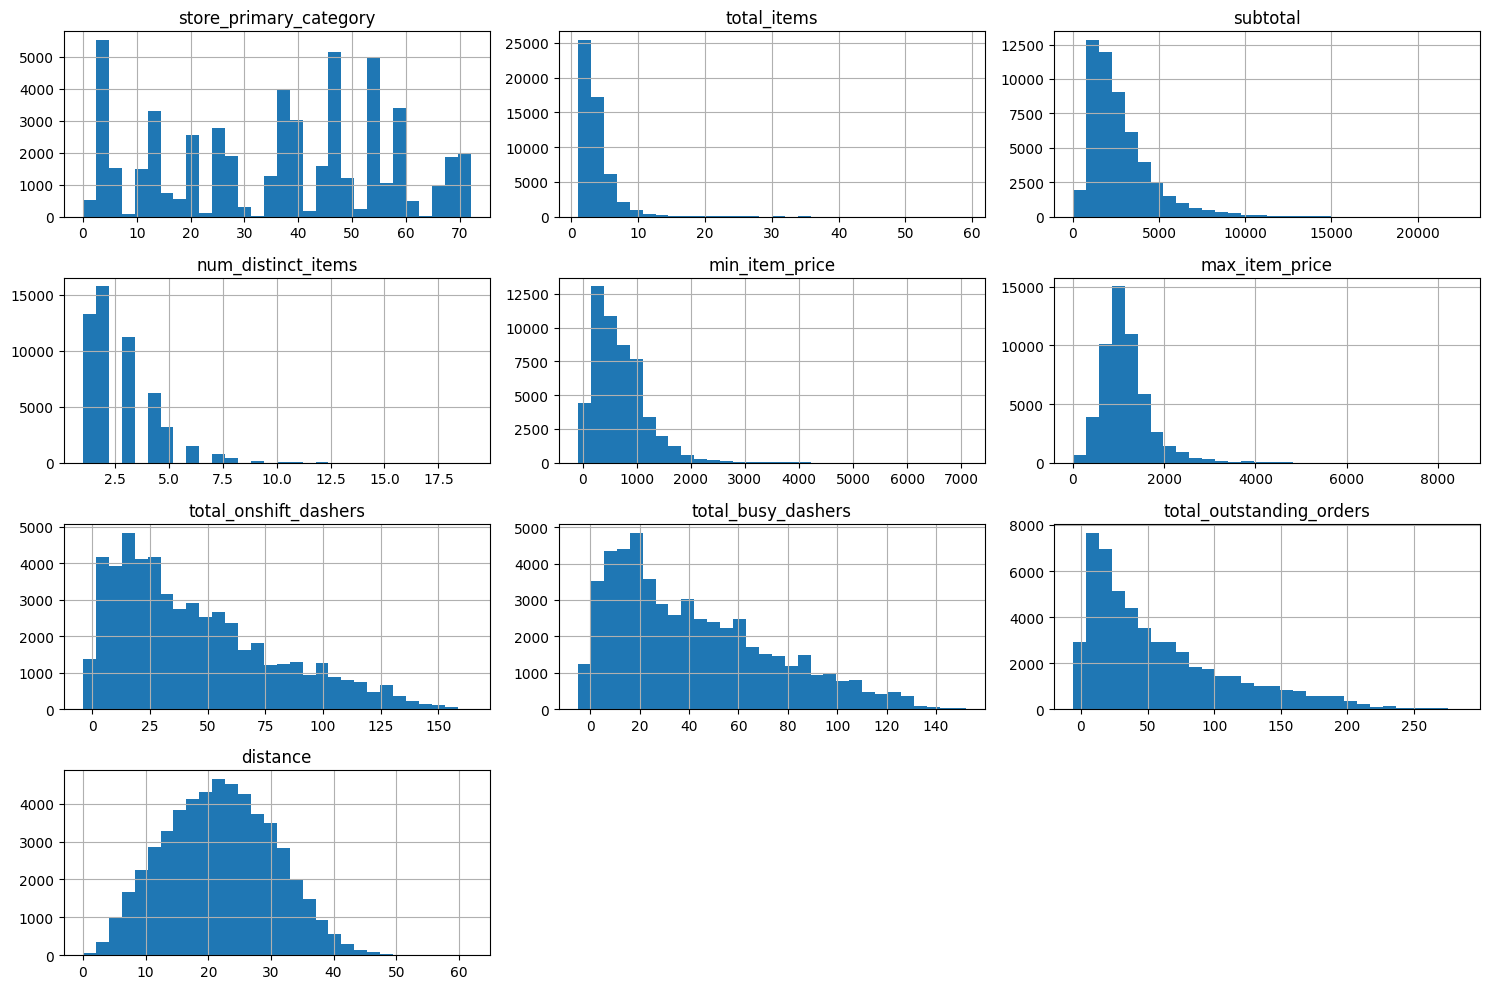

In [335]:
# Plot distributions for all numerical columns
X_test[numerical_columns].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

##### **4.1.2**
Check the distribution of categorical features

In [336]:
# Distribution of categorical columns
X_test[categorical_columns].nunique()
x_test_cat = X_test[categorical_columns]
x_test_cat.head()

Empty DataFrame
Columns: []
Index: [139667, 80077, 41872, 165269, 151215]

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

Text(0, 0.5, 'Frequency')

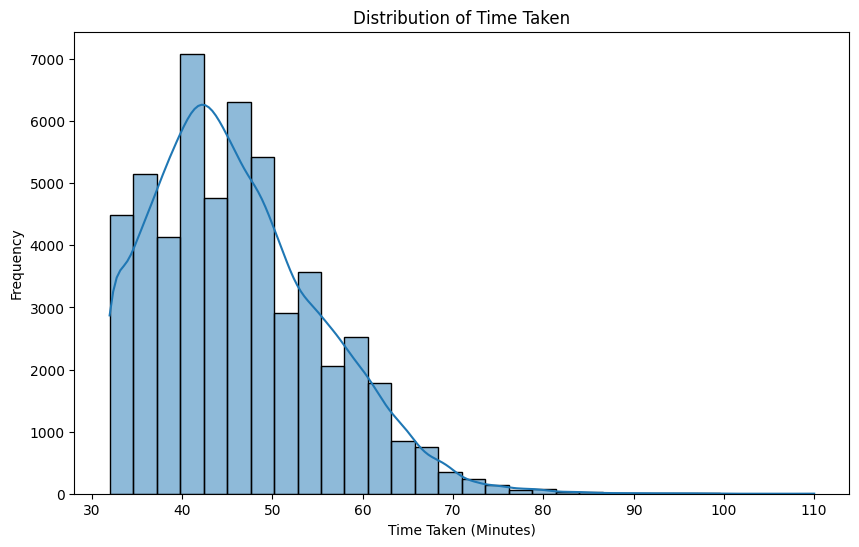

In [337]:
# Distribution of time_taken
plt.figure(figsize=(10, 6))
sns.histplot(y_test, bins=30, kde=True)
plt.title('Distribution of Time Taken')
plt.xlabel('Time Taken (Minutes)')
plt.ylabel('Frequency')


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

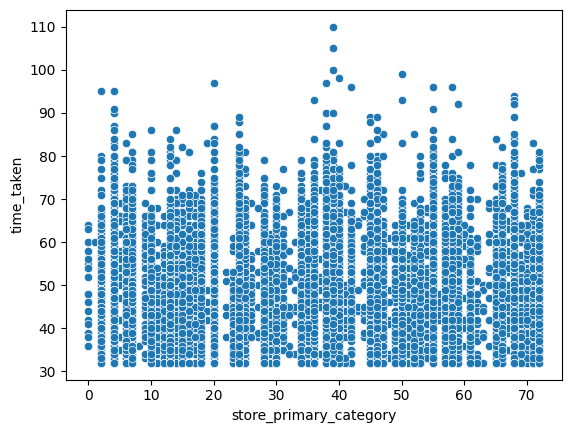

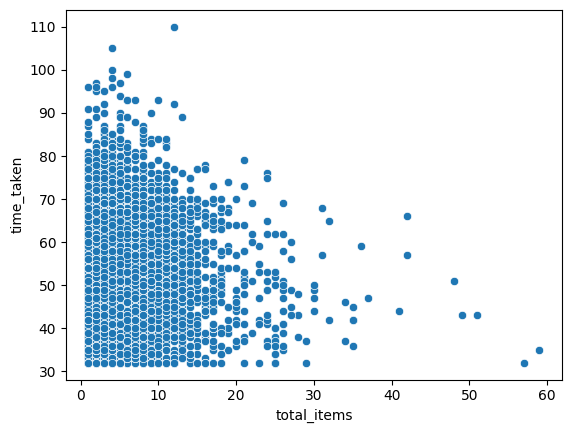

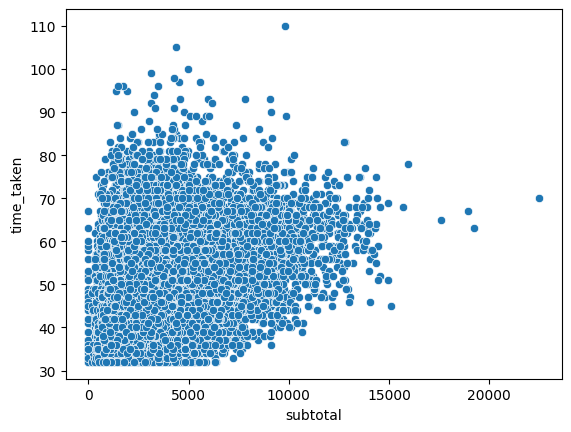

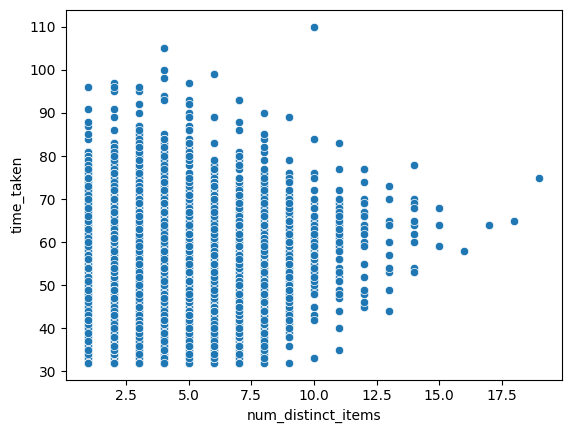

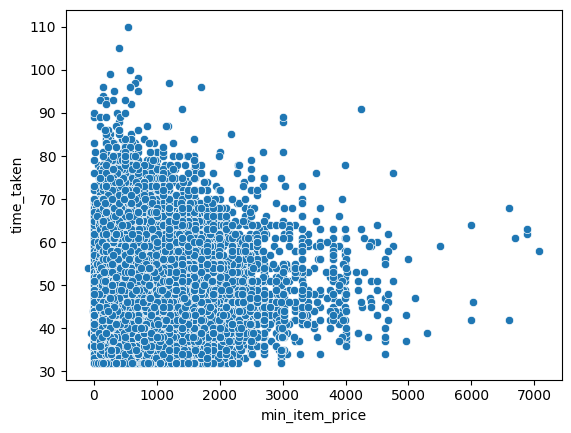

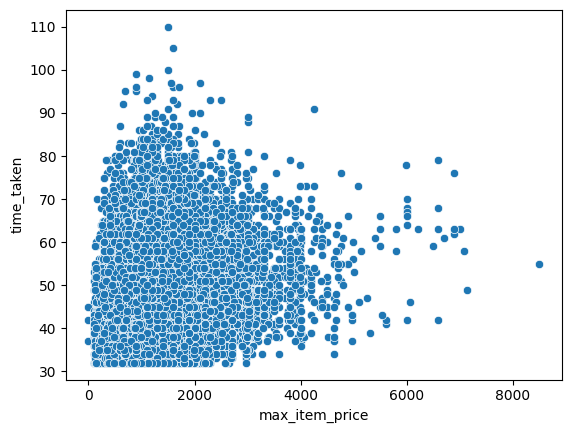

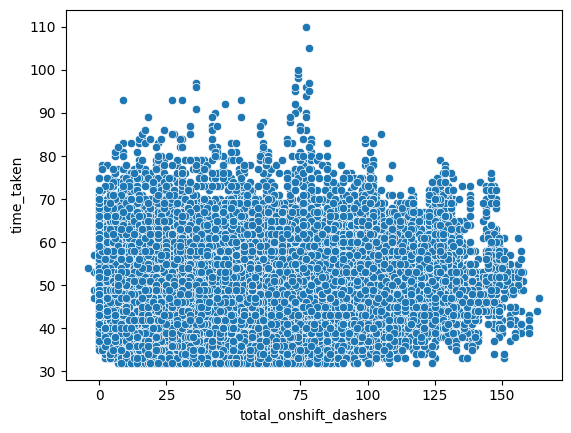

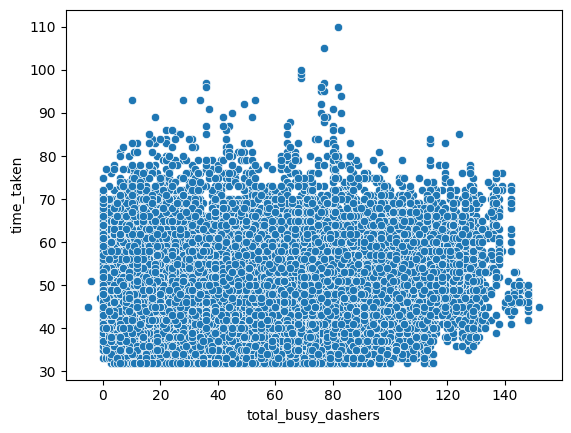

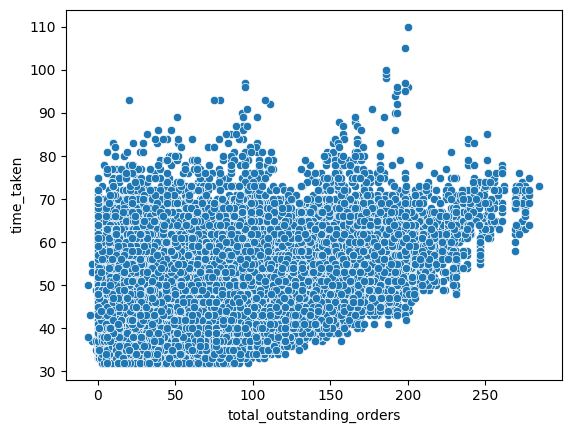

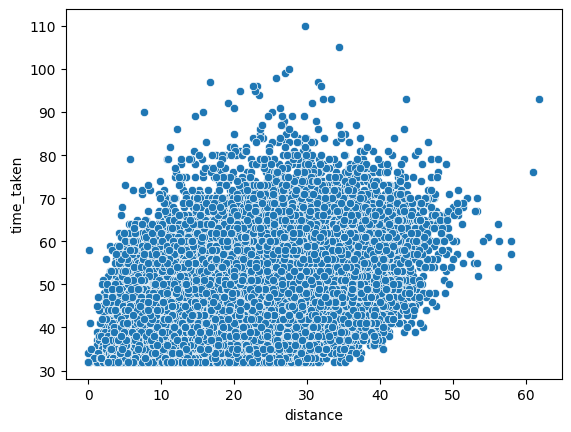

In [338]:
# Scatter plot to visualise the relationship between time_taken and other features
for i in X_test[numerical_columns]:
    sns.scatterplot(x=X_test[i], y=y_test)
    plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

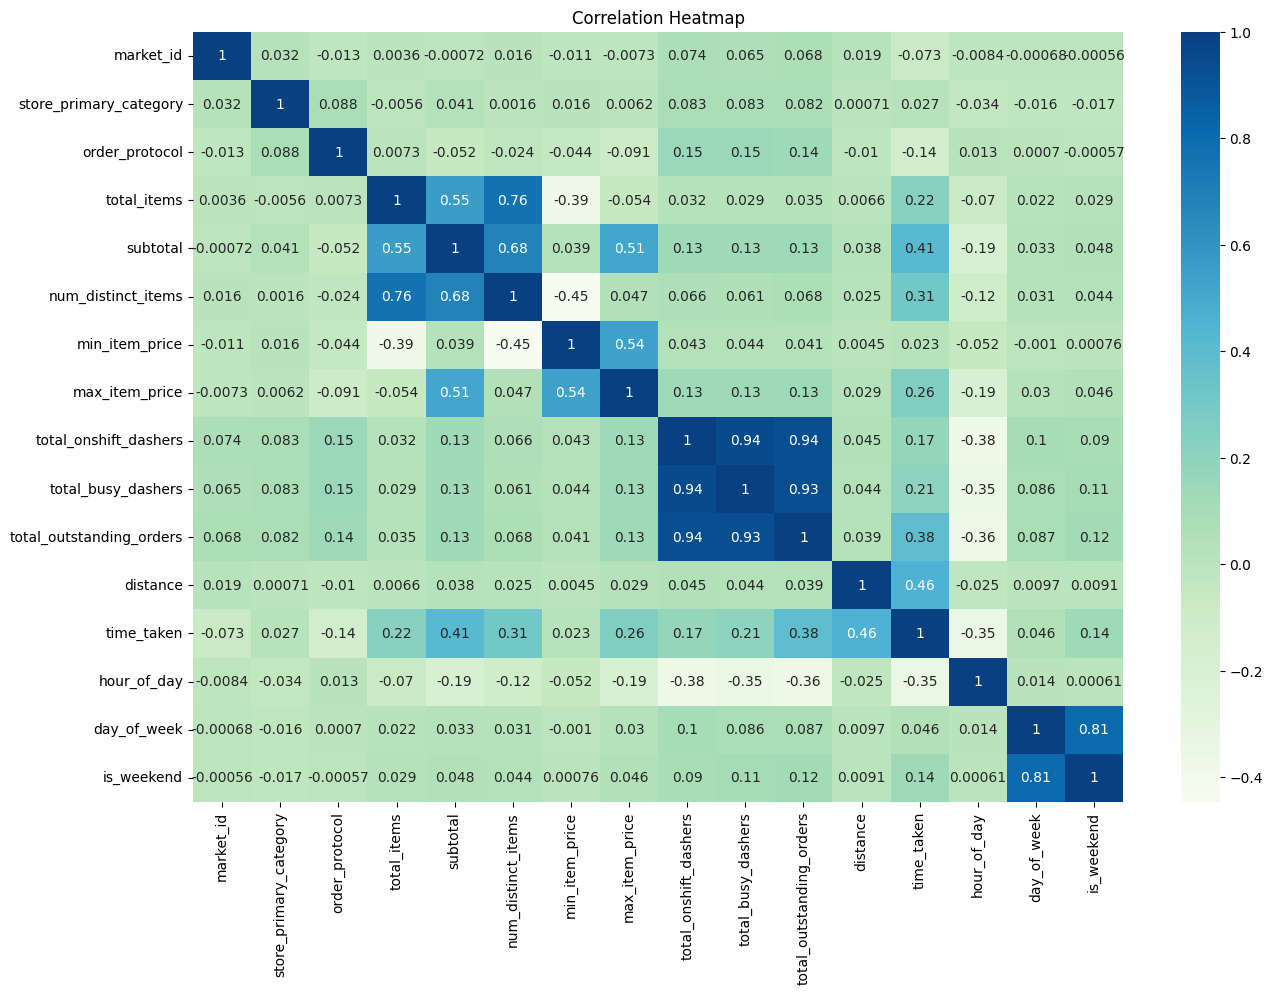

In [339]:
# Drop the weakly correlated columns from training dataset
plt.figure(figsize=(15, 10))
sns.heatmap(portar.corr(), annot=True, cmap="GnBu")
plt.title('Correlation Heatmap')
plt.show()

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [340]:
# Import libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [341]:
# Apply scaling to the numerical columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [343]:
X_train_df=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df=pd.DataFrame(X_test_scaled, columns=X_test.columns)

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [252]:
# Create/Initialise the model
lm = LinearRegression()


In [344]:
# Train the model using the training data
rfe = RFE(estimator=lm, n_features_to_select=8)
rfe = rfe.fit(X_train_df, y_train)


In [345]:
feature=rfe.support_
features=X_train_df.columns[feature]
print(features)

Index(['subtotal', 'num_distinct_items', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders', 'distance',
       'hour_of_day', 'is_weekend'],
      dtype='object')


In [346]:
X_train=X_train_df[features]
X_test=X_test_df[features]

In [347]:
X_train.shape, X_test.shape

((102483, 8), (52734, 8))

In [351]:
# Make predictions
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [352]:
# Find results for evaluation metrics
re=lm.score(X_test, y_test)
print(re)

0.8586502641503106


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [353]:
# Loop through the number of features and test the model
from sklearn.feature_selection import RFE
for i in range(1, 13):
    selector = RFE(lm, n_features_to_select=i, step=1)
    selector = selector.fit(X_train, y_train)

    print(i, selector.support_)
    print(i, selector.ranking_)
    print(i, selector.score(X_test, y_test))

    X_train_rfe = selector.transform(X_train)
    X_test_rfe = selector.transform(X_test)
    lm.fit(X_train_rfe, y_train)
    print(i, lm.score(X_test_rfe, y_test))


1 [False False False False  True False False False]
1 [5 8 2 3 1 4 6 7]
1 0.13508783602199048
1 0.13508783602199048
2 [False False  True False  True False False False]
2 [4 7 1 2 1 3 5 6]
2 0.42873722912730605
2 0.42873722912730605
3 [False False  True  True  True False False False]
3 [3 6 1 1 1 2 4 5]
3 0.45079586674544503
3 0.45079586674544503
4 [False False  True  True  True  True False False]
4 [2 5 1 1 1 1 3 4]
4 0.6653232264448066
4 0.6653232264448066
5 [ True False  True  True  True  True False False]
5 [1 4 1 1 1 1 2 3]
5 0.8011120669606548
5 0.8011120669606548
6 [ True False  True  True  True  True  True False]
6 [1 3 1 1 1 1 1 2]
6 0.8529100280345906
6 0.8529100280345906
7 [ True False  True  True  True  True  True  True]
7 [1 2 1 1 1 1 1 1]
7 0.8571347297162277
7 0.8571347297162277
8 [ True  True  True  True  True  True  True  True]
8 [1 1 1 1 1 1 1 1]
8 0.8586502641503106
8 0.8586502641503106
9 [ True  True  True  True  True  True  True  True]
9 [1 1 1 1 1 1 1 1]
9 0.858650

In [360]:
# Build the final model with selected number of features
from sklearn.feature_selection import RFE
selector = RFE(lm, n_features_to_select=8, step=1)
selector = selector.fit(X_train, y_train)



In [374]:
lr_df=pd.DataFrame(selector.feature_names_in_, columns=['Feature Names'])
lr_df['co_efficient']=selector.estimator_.coef_
lr_df

Feature Names  co_efficient
0                  subtotal      1.871827
1        num_distinct_items      0.451529
2     total_onshift_dashers    -11.957092
3        total_busy_dashers     -4.092703
4  total_outstanding_orders     16.076426
5                  distance      4.169394
6               hour_of_day     -2.212709
7                is_weekend      0.641108

In [361]:
print (selector.support_)
print (selector.ranking_)
print (selector.score(X_train, y_train))

[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]
0.8455723007686833


In [364]:
from sklearn.metrics import mean_squared_error, r2_score
r2_train=selector.score(X_train, y_train)
r2_test=selector.score(X_test, y_test)
print(r2_train, r2_test)

0.8455723007686833 0.8586502641503106


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

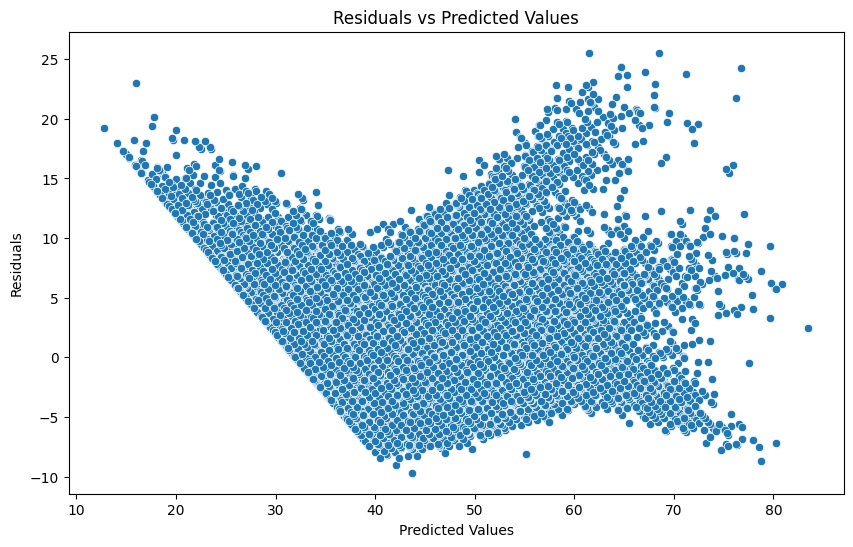

In [357]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
residuals = y_train - selector.predict(X_train)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=selector.predict(X_train), y=residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


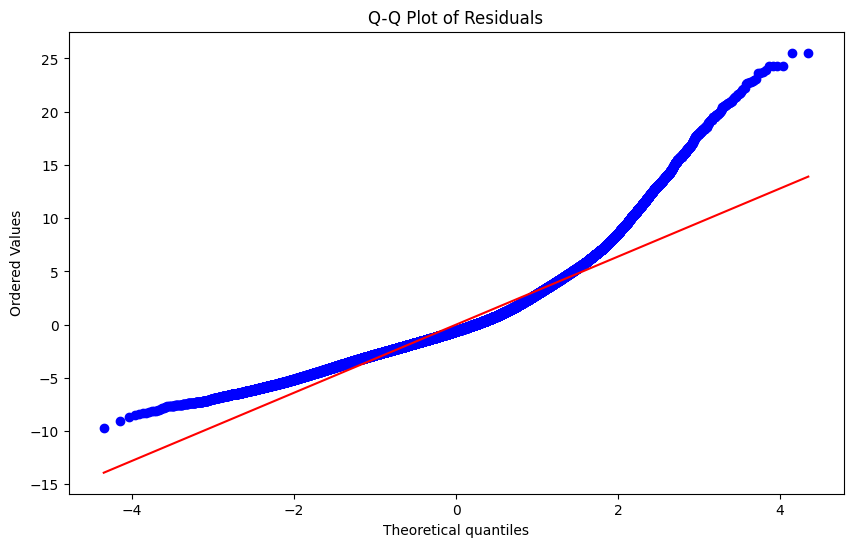

In [366]:
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

Text(0, 0.5, 'Frequency')

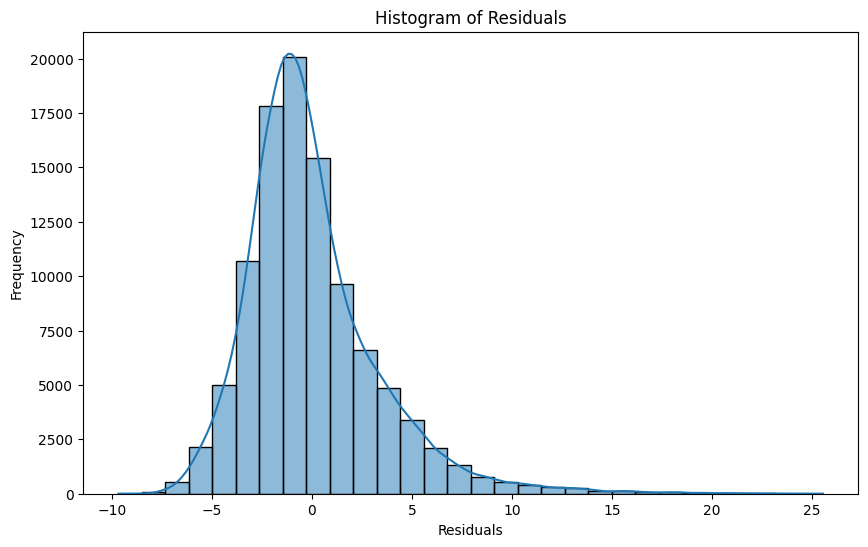

In [367]:
#Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

[link text](https:// [link text](https://))[Your inferences here:]Residuals are normally distributed at the centre



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [379]:
# Compare the scaled vs unscaled features used in the final models
from sklearn.preprocessing import StandardScaler
#from sklearn import preprocessing # This import is not used
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_train)
unscaled_features = scaler.inverse_transform(scaled_features)

print("scaled Features:", scaled_features)

print("Unscaled Features:", unscaled_features)
scaled_coefficients = selector.estimator_.coef_

# Create a new scaler and fit it on the selected features from training data
scaler_rfe = StandardScaler()
X_train_selected = X_train[[X_train.columns[i] for i in range(len(selector.support_)) if selector.support_[i]]]
scaler_rfe.fit(X_train_selected)

# Use the new scaler to inverse transform the coefficients
unscaled_coefficients = scaler_rfe.inverse_transform(scaled_coefficients.reshape(1, -1))
unscaled_coefficients = unscaled_coefficients.flatten()

print("Scaled Coefficients:", scaled_coefficients)
print("Unscaled Coefficients:", unscaled_coefficients)

scaled Features: [[-0.40238292 -0.33400434 -1.00960667 ... -0.42180497  1.01095779
  -0.69140583]
 [-1.18598398 -1.15102186  3.0964339  ...  0.29655206 -0.80017738
   1.44632855]
 [-0.3111701  -1.15102186 -0.64536113 ...  0.75243249  1.57693753
   1.44632855]
 ...
 [ 1.34226958  2.93406577  0.77850777 ...  0.1077531   1.57693753
   1.44632855]
 [ 0.60095811 -0.33400434  0.11624316 ... -0.00736822  1.12415374
  -0.69140583]
 [ 1.2228637  -0.33400434  0.0500167  ...  0.63731117 -1.02656927
  -0.69140583]]
Unscaled Features: [[-0.40238292 -0.33400434 -1.00960667 ... -0.42180497  1.01095779
  -0.69140583]
 [-1.18598398 -1.15102186  3.0964339  ...  0.29655206 -0.80017738
   1.44632855]
 [-0.3111701  -1.15102186 -0.64536113 ...  0.75243249  1.57693753
   1.44632855]
 ...
 [ 1.34226958  2.93406577  0.77850777 ...  0.1077531   1.57693753
   1.44632855]
 [ 0.60095811 -0.33400434  0.11624316 ... -0.00736822  1.12415374
  -0.69140583]
 [ 1.2228637  -0.33400434  0.0500167  ...  0.63731117 -1.02656

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [380]:
from math import e
# Analyze the effect of a unit change in a feature, say 'total_items'
if 'total_items' in X_train.columns:
    total_items_index = X_train.columns.get_loc('total_items')
    print(total_items_index)
    effect_of_unit_change = scaled_coefficients[total_items_index]
    print("Effect of a unit change in 'total_items':", effect_of_unit_change)
    effect_of_unit_change_unscaled = unscaled_coefficients[total_items_index]
    print("Effect of a unit change in 'total_items' (unscaled):", effect_of_unit_change_unscaled)
else:
    print("'total_items' is not in the selected features.")

'total_items' is not in the selected features.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

** *italicized text*Answer:**
>'created_at', 'actual_delivery_time' were the categorical variable in the data.  
These variables help in predicting the delivery times accurately.

While these were used to derive at features such as hour_of_day and is_weekend to predict the likely influence on the dependent variable i.e time_taken for delivery.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

[link text](https://)**Answer:**
>In machine learning, Initially Models developed will be trained first on Training Data which helps the algorithm learn patterns and relationships.
The trained Model i.e smaller size data is kept separate to evaluate the model's performance and ensure it doesn't just memorize the training data, but can also make accurate predictions on new inputs based on the test data available.
In the context, test_size=0.2 means 20% of data will be used for testing and remaining 80% of data will be used to train the Model.

```
# This is formatted as code
```





---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>Correlation coefficient is a numerical value that ranges from -1 to +1.  It indicates the strength and direction of relationship between the two variable.

As per the heatmap Distance is having highest correlation of 0.46 with the target variable i.e time_taken.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>Visualised potential outliers for the target variable and other numerical features using boxplots.

Checked for negative values.  

Negative values in total_onshift_dashers, total_busy_dashers, total_outstadning_orders, min_item_price and Max_item_price were available.  

One approach in handling inconsistent data is to eliminate the negative values.
Values of min_item_price and max_item_price were zero and subtotal were zero, min_item_price was more than max_item_price same was handled by interchanging the values, negative values were handled by multiplying the negative value by -1.
Similarly all negative values in other columns were handled.

To handle outliers, capping outliers technique, i.e Interquartile Range (IQR) method was used in data preprocessing to limit extreme values that can skew analysis.

The IQR method is effective for identifying and removing outliers, which can be seen in the significant difference in the spread and range of the data before and after outlier removal. This approach is crucial in statistical analysis for ensuring that the results are not skewed by extreme values.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Top 3 features affectiving the delivery time are
i)Total_outstanding_orders
ii)Distance and
iii)subtotal



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>The equation of Linear regression obtained after final model is

time_taken=(subtotal * 1.871827)+(num_distinct_items * 0.451529)-(total_onshift_dashers * 11.957092) - (total_busy_dashers * 4.092703) + (total_outstanding_orders * 16.076426) + (distance * 4.169394) - (hour_of_day*2.212709) + (is_weekend *0.641108)

Each coefficient represents the impact of an independent variable on time_taken:
Subtotal (1.87): i.e., the Larger order subtotals increase delivery time, num_distinct_items(0.45)-More unique items slightly increase delivery time,Onshift Dashers(-11.95) i.e., if more dashers are available it will reduce delivery time, Busy Dashers (-4.09) if more dashers are currently delivering reduces delivery time, Outstanding Orders (16.07)- if High pending orders increase delivery time, if Distance (4.17)is Greater, delivery distance increases delivery time,
Hour of Day (-2.21)i.e., Later hours may reduce delivery time, and
the Weekend (0.64) deliveries may take slightly longer time.





---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>The simple linear regression is the most elementary type of regression model which explains the relationship between a dependent variable and one independent variable using a straight line.

The equation for a simple linear regression is Y=mX+C
where C is the intercept
m is the slope of equation
Y is the dependent variable
and X is the independent variable.

where as in a multiple linear regression is a statistical technique to understand the relationship between one dependent variable and several independent variables.  Its object is to find a linear equation that can best determine the value of dependent variable Y for different independent variables.

equation is Y = C+M1*X1+M2*X2+....+Mn*Xn

where C is the intercept
M1,M2 .. Mn is the slope of variables X1, X2 .. Xn
Y is the dependent variable
and X1, X2..Xn are the independent variables.

Simple linear regression is simple as it has only one independent variable / one relationship whereas complexity increases in Multiple linear regression.

In simple linear regression typically visualized with 2D scatter plot and a line of best fit whereas Multiple linear regression requires a 3D or multi-dimensional space, often represented using partial regression plots.





---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The Cost function in a linear regression measures how well the predictions of model aligns with the actual data.  It actually measures the difference between the predicted values and actual outcomes helping in minimizing the errors by adjusting its parameters and weights of the model.  It provides a way to evaluate the model perforance and helps in optimizing by finding parameters that minimizes the error.  It also helps in finding the best fit line for the model




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**
Overfitting in Machine Learning model happens when a model learns too much / closely follows the training data.

It offers ideal predictions when tested against training data but fail against new, unidentified data.

Overfitting is observed if model is highly complex,  model overtrains on a single or a specific data set, if training data contains inapplicable information or noise.

Underfitting is the opposite of overfitting.  It happens when a model is too simple to capture data or learn underlying patterns in the training data.

Underfitting model is simple and not capable of representing the complexities in the data, the features used to train model are inadquate representations of underlying factors influencing the target variable.

Size of training dataset is not enough or features are not scaled properly.>



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>A residual plot is a graphical representation of the residuals (errors)in a linear regression model against the predictor variables in a regression analysis.  Residuals are the difference between the observed values of the dependent variable and the predicted values obtained from the linear regression model.  In simple terms a residual plot shows how far off the predictions are from the actual data points.  These plots help assess the assumptions and adequacy of the regression model.
In residual plots, if the residuals exhibit a random pattern around the horizontal axis, it indicates that the regression model is appropriate and adequately captures the variability in the data. However, if the residuals show a systematic pattern, such as a curve or funnel shape, it suggests that the regression model may not be the best fit for the data.
Residual plots helps in identifying the outliers or influential data points that may affect the regression analysis results.
By examining residual plots, we can make informed decisions about the validity and reliability of the regression model and make any required adjustments to the regression model to improve its accuracy.
